In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
import scipy.stats as stats

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [45]:
df_raw = pd.read_csv('data/bank.csv')
df_raw['JOB'].fillna('Other', inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

df_raw_dummy = pd.get_dummies(df_raw)

df_train, df_test = train_test_split(df_raw_dummy, test_size= 0.2, random_state=1234)
print('학습용 데이터의 크기: {}'.format(df_train.shape))
print('평가용 데이터의 크기: {}'.format(df_test.shape))

df_train_y = df_train['BAD']
df_train_x = df_train.drop(columns = 'BAD', inplace = False)
df_test_y = df_test['BAD']
df_test_x = df_test.drop(columns = 'BAD', inplace = False)

학습용 데이터의 크기: (2998, 19)
평가용 데이터의 크기: (750, 19)


C:\Users\User\AppData\Local\Temp/ipykernel_4760/1690711287.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(), inplace = True)


In [21]:
# 기본 옵션으로 SVC 모델 생성, 표준화 x

svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)

pred_train = svm_uncustomized.predict(df_train_x)
pred_test = svm_uncustomized.predict(df_test_x)

print('학습용 데이터의 F1 score: {}'.format(f1_score(df_train_y, pred_train)))
print('평가용 데이터의 F1 score: {}'.format(f1_score(df_test_y, pred_test)))

print('학습용 데이터의 정확도: {}'.format(svm_uncustomized.score(df_train_x, df_train_y)))
print('평가용 데이터의 정확도: {}'.format(svm_uncustomized.score(df_test_x, df_test_y)))

학습용 데이터의 F1 score: 0.0
평가용 데이터의 F1 score: 0.0
학습용 데이터의 정확도: 0.9069379586390928
평가용 데이터의 정확도: 0.912


# 표준화 진행

In [24]:
v_feature_name = df_train_x.columns
scalar = StandardScaler()
df_train_scaled_x = scalar.fit_transform(df_train_x)
df_test_scaled_x = scalar.transform(df_test_x)
df_train_scaled_x = pd.DataFrame(df_train_scaled_x, columns = v_feature_name)
df_test_scaled_x = pd.DataFrame(df_test_scaled_x, columns = v_feature_name)
df_train_scaled_x.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-0.842503,0.095933,0.089837,-1.236705,-0.272211,-0.340120,0.738012,-0.004791,1.708454,-1.739750,0.646656,-0.646656,-0.3758,2.203513,-0.824920,-0.574012,-0.130233,-0.193314
1,0.503899,0.442083,0.383761,-0.151444,-0.272211,-0.340120,-0.176614,-0.650392,0.871261,0.559778,0.646656,-0.646656,-0.3758,2.203513,-0.824920,-0.574012,-0.130233,-0.193314
2,-0.291702,0.135281,-0.259109,-0.151444,1.427971,2.106699,2.003515,0.013920,2.022401,0.388368,0.646656,-0.646656,-0.3758,-0.453821,-0.824920,1.742123,-0.130233,-0.193314
3,-0.947417,0.006812,-0.421775,1.612106,-0.272211,-0.340120,2.116538,-0.650392,2.650295,-0.704729,-1.546416,1.546416,-0.3758,-0.453821,1.212239,-0.574012,-0.130233,-0.193314
4,-0.265474,0.236048,-0.125396,0.001904,-0.272211,-0.340120,-0.054739,-0.004791,0.348016,1.027031,-1.546416,1.546416,-0.3758,2.203513,-0.824920,-0.574012,-0.130233,-0.193314


In [25]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_train_scaled_x, df_train_y)

print('학습용 데이터의 정확도: {:.3f}'.format(svm_scaled.score(df_train_scaled_x, df_train_y)))
print('평가용 데이터의 정확도: {:.3f}'.format(svm_scaled.score(df_test_scaled_x, df_test_y)))

학습용 데이터의 정확도: 0.943
평가용 데이터의 정확도: 0.941


In [27]:
# C 규제에 대한 강도 변경

train_score = []
test_score = []
train_f1, test_f1 = [], []

para_c = [10 ** c for c in range(-2, 2)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state=1234)
    svm.fit(df_train_scaled_x, df_train_y)
    train_score.append(svm.score(df_train_scaled_x, df_train_y))
    test_score.append(svm.score(df_test_scaled_x, df_test_y))  
    
    train_pred = svm.predict(df_train_scaled_x)
    test_pred = svm.predict(df_test_scaled_x)
    train_f1.append(f1_score(df_train_y, train_pred))
    test_f1.append(f1_score(df_test_y, test_pred))

# 결과 저장
df_score_c = pd.DataFrame()
df_score_c['C'] = para_c
df_score_c['TrainScore'] = train_score
df_score_c['TestScore'] = test_score
df_score_c['TrainF1'] = train_f1
df_score_c['TestF1'] = test_f1

df_score_c.round(3)

,C,TrainScore,TestScore,TrainF1,TestF1
0,0.01,0.907,0.912,0.000,0.000
1,0.10,0.907,0.912,0.000,0.000
2,1.00,0.943,0.941,0.554,0.500
3,10.00,0.977,0.959,0.859,0.699


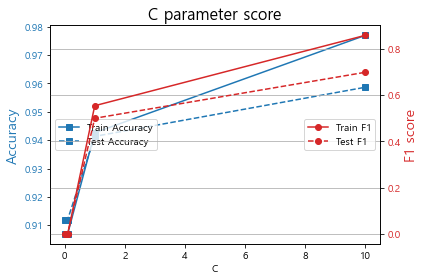

In [28]:
fig, ax1 = plt.subplots() 
color_1 = 'tab:blue' 
ax1.set_title('C parameter score', fontsize=16) 
ax1.set_xlabel('C') 
ax1.set_ylabel('Accuracy', fontsize=14, color=color_1) 
ax1.plot(para_c, train_score, marker='s', linestyle = '-', color=color_1, label = 'Train Accuracy') 
ax1.plot(para_c, test_score, marker='s', linestyle = '--', color=color_1, label = 'Test Accuracy') 
ax1.tick_params(axis='y', labelcolor=color_1) 
plt.legend(loc = 'center left')
# right side with different scale 
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis 
color_2 = 'tab:red' 
ax2.set_ylabel('F1 score', fontsize=14, color=color_2) 
ax2.plot(para_c, train_f1, marker='o', color=color_2, linestyle = '-', label = 'Train F1') 
ax2.plot(para_c, test_f1, marker='o', color=color_2, linestyle = '--', label = 'Test F1') 
ax2.tick_params(axis='y', labelcolor=color_2) 
fig.tight_layout() 
plt.grid()
plt.legend(loc = 'center right')
plt.show()

In [34]:
# Gamma 조정

train_score = []
test_score = []
train_f1, test_f1 = [], []

para_gamma = [10 ** gamma for gamma in range(-2, 2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, random_state=1234)
    svm.fit(df_train_scaled_x, df_train_y)
    train_score.append(svm.score(df_train_scaled_x, df_train_y))
    test_score.append(svm.score(df_test_scaled_x, df_test_y))  
    
    train_pred = svm.predict(df_train_scaled_x)
    test_pred = svm.predict(df_test_scaled_x)
    train_f1.append(f1_score(df_train_y, train_pred))
    test_f1.append(f1_score(df_test_y, test_pred))

# 결과 저장
df_score_gamma = pd.DataFrame()
df_score_gamma['Gamma'] = para_gamma
df_score_gamma['TrainScore'] = train_score
df_score_gamma['TestScore'] = test_score
df_score_gamma['TrainF1'] = train_f1
df_score_gamma['TestF1'] = test_f1

df_score_gamma.round(3)

,Gamma,TrainScore,TestScore,TrainF1,TestF1
0,0.01,0.922,0.924,0.283,0.240
1,0.10,0.959,0.948,0.717,0.581
2,1.00,0.996,0.931,0.976,0.350
3,10.00,1.000,0.913,1.000,0.030


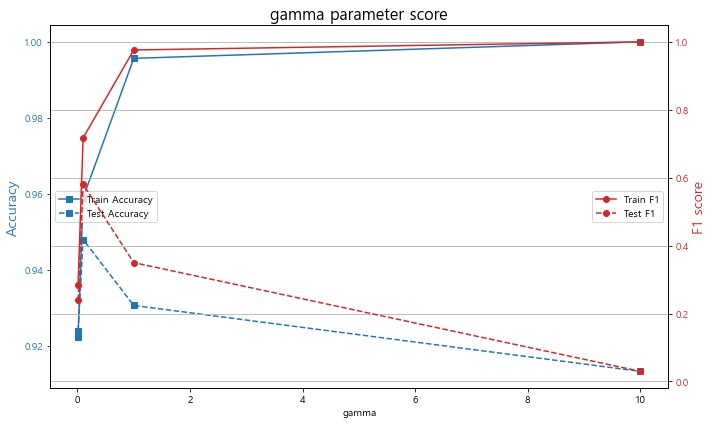

In [35]:

fig, ax1 = plt.subplots(figsize = (10, 6)) 

color_1 = 'tab:blue' 
ax1.set_title('gamma parameter score', fontsize=16) 
ax1.set_xlabel('gamma') 
ax1.set_ylabel('Accuracy', fontsize=14, color=color_1) 
ax1.plot(para_gamma, train_score, marker='s', linestyle = '-', color=color_1, label = 'Train Accuracy') 
ax1.plot(para_gamma, test_score, marker='s', linestyle = '--', color=color_1, label = 'Test Accuracy') 
ax1.tick_params(axis='y', labelcolor=color_1) 
plt.legend(loc = 'center left')
# right side with different scale 
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis 
color_2 = 'tab:red' 
ax2.set_ylabel('F1 score', fontsize=14, color=color_2) 
ax2.plot(para_gamma, train_f1, marker='o', color=color_2, linestyle = '-', label = 'Train F1') 
ax2.plot(para_gamma, test_f1, marker='o', color=color_2, linestyle = '--', label = 'Test F1') 
ax2.tick_params(axis='y', labelcolor=color_2) 
fig.tight_layout() 
plt.grid()
plt.legend(loc = 'center right')
plt.show()

- Grid Search

In [37]:
estimators = SVC(random_state = 1234)
param_grid = {'C': para_c, 'gamma': para_gamma}

grid_svc = GridSearchCV(estimators, param_grid, scoring = 'f1', n_jobs = -1)
grid_svc.fit(df_train_scaled_x, df_train_y)

print('best estimator model: \n{}'.format(grid_svc.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_svc.best_params_))
print('\nbest score: \n{}'.format(grid_svc.best_score_.round(3)))

best estimator model: 
SVC(C=10, gamma=0.1, random_state=1234)

best parameter: 
{'C': 10, 'gamma': 0.1}

best score: 
0.688


In [38]:
estimators = SVC(random_state = 1234)
param_grid = {'C': para_c, 'gamma': para_gamma}

rand_svc = RandomizedSearchCV(estimators, param_grid, scoring = 'f1', n_jobs = -1)
rand_svc.fit(df_train_scaled_x, df_train_y)

print('best estimator model: \n{}'.format(rand_svc.best_estimator_))
print('\nbest parameter: \n{}'.format(rand_svc.best_params_))
print('\nbest score: \n{}'.format(rand_svc.best_score_.round(3)))

best estimator model: 
SVC(C=1, gamma=0.1, random_state=1234)

best parameter: 
{'gamma': 0.1, 'C': 1}

best score: 
0.498


In [41]:
# 최종 모델 선택

svc_final = SVC(gamma = 0.1, C = 10, random_state=1234)
svc_final.fit(df_train_scaled_x, df_train_y)
y_pred = svc_final.predict(df_test_scaled_x)

print('Confusion matrix\n',confusion_matrix(df_test_y, y_pred))
print('Classification Report\n', classification_report(df_test_y, y_pred))

Confusion matrix
 [[682   2]
 [ 27  39]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       684
           1       0.95      0.59      0.73        66

    accuracy                           0.96       750
   macro avg       0.96      0.79      0.85       750
weighted avg       0.96      0.96      0.96       750



# 실습

In [42]:
df_tel = pd.read_csv('data/tele_customer.csv')
df_tel['CHURN'].replace({'Active': 0, 'Churned': 1}, inplace = True)
df_tel_dummy = pd.get_dummies(df_tel)

df_tel_y = df_tel_dummy['CHURN']
df_tel_x = df_tel_dummy.drop(columns = 'CHURN')

df_train_x, df_test_x, df_train_y, df_train_y = train_test_split(df_tel_x, df_tel_y, test_size=0.2, random_state=1234)

In [ ]:
# 표준화
v_feature_name = df_train_x.columns
scalar = StandardScaler()
df_train_scaled_x = scalar.fit_transform(df_train_x)
df_test_scaled_x = scalar.transform(df_test_x)
df_train_scaled_x = pd.DataFrame(df_train_scaled_x, columns = v_feature_name)
df_test_scaled_x = pd.DataFrame(df_test_scaled_x, columns = v_feature_name)
df_train_scaled_x.head()

# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
# 기본 옵션으로

knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

pred_train = knn_uncustomized.predict(df_train_x)
pred_test = knn_uncustomized.predict(df_test_x)

print('학습용 데이터의 F1 score: {}'.format(f1_score(df_train_y, pred_train)))
print('평가용 데이터의 F1 score: {}'.format(f1_score(df_test_y, pred_test)))

print('학습용 데이터의 정확도: {}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
print('평가용 데이터의 정확도: {}'.format(knn_uncustomized.score(df_test_x, df_test_y)))

학습용 데이터의 F1 score: 0.20987654320987653
평가용 데이터의 F1 score: 0.23376623376623376
학습용 데이터의 정확도: 0.914609739826551
평가용 데이터의 정확도: 0.9213333333333333


- K수 증가에 따른 정확도

In [47]:
train_score = []
test_score = []
train_f1, test_f1 = [], []

para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))  
    
    train_pred = knn.predict(df_train_x)
    test_pred = knn.predict(df_test_x)
    train_f1.append(f1_score(df_train_y, train_pred))
    test_f1.append(f1_score(df_test_y, test_pred))

# 결과 저장
df_score_neighbors = pd.DataFrame()
df_score_neighbors['n_neighbors'] = para_n_neighbors
df_score_neighbors['TrainScore'] = train_score
df_score_neighbors['TestScore'] = test_score
df_score_neighbors['TrainF1'] = train_f1
df_score_neighbors['TestF1'] = test_f1

df_score_neighbors.round(3)

,n_neighbors,TrainScore,TestScore,TrainF1,TestF1
0,1,1.000,0.891,1.000,0.328
1,2,0.927,0.920,0.349,0.211
2,3,0.925,0.913,0.391,0.235
3,4,0.915,0.923,0.186,0.216
4,5,0.915,0.921,0.210,0.234
5,6,0.913,0.916,0.127,0.087
6,7,0.913,0.913,0.138,0.110
7,8,0.909,0.916,0.055,0.087
8,9,0.909,0.916,0.068,0.087
9,10,0.909,0.915,0.042,0.059


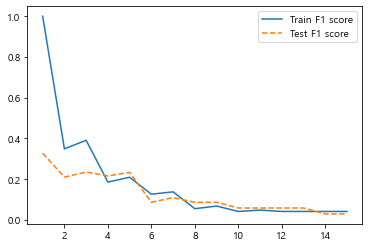

In [49]:
plt.plot(para_n_neighbors, train_f1, linestyle = '-', label = 'Train F1 score')
plt.plot(para_n_neighbors, test_f1, linestyle = '--', label = 'Test F1 score')
plt.legend()

In [50]:
# k = 5

In [63]:
# 가중치별 이웃 수 증가에 따른 정확도 변화

train_score = []
test_score = []
train_f1, test_f1 = [], []
# 이웃 수
para_n_neighbors = [i for i in range(1, 11)] * 2
# 가중치 종류
para_weights = (['uniform']) * 10 + (['distance'] * 10) 

for (v_n_neighbors, v_weights) in zip (para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))  
    
    train_pred = knn.predict(df_train_x)
    test_pred = knn.predict(df_test_x)
    train_f1.append(f1_score(df_train_y, train_pred))
    test_f1.append(f1_score(df_test_y, test_pred))

# 결과 저장
df_score_weights = pd.DataFrame()
df_score_weights['Neighbors'] = para_n_neighbors
df_score_weights['Weights'] = para_weights
df_score_weights['TrainScore'] = train_score
df_score_weights['TestScore'] = test_score
df_score_weights['TrainF1'] = train_f1
df_score_weights['TestF1'] = test_f1

df_score_weights.round(3)

,Neighbors,Weights,TrainScore,TestScore,TrainF1,TestF1
0,1,uniform,1.000,0.891,1.000,0.328
1,2,uniform,0.927,0.920,0.349,0.211
2,3,uniform,0.925,0.913,0.391,0.235
3,4,uniform,0.915,0.923,0.186,0.216
4,5,uniform,0.915,0.921,0.210,0.234
5,6,uniform,0.913,0.916,0.127,0.087
6,7,uniform,0.913,0.913,0.138,0.110
7,8,uniform,0.909,0.916,0.055,0.087
8,9,uniform,0.909,0.916,0.068,0.087
9,10,uniform,0.909,0.915,0.042,0.059


In [52]:
# plt 그리기 위해 데이터프레임의 형태를 변환

df_score_weights_pivot = df_score_weights.pivot(index = 'Neighbors', columns = 'Weights', values = ['TrainF1', 'TestF1'])
df_score_weights_pivot

TrainF1              TestF1          
Weights   distance   uniform  distance   uniform
Neighbors                                       
1              1.0  1.000000  0.327869  0.327869
2              1.0  0.349112  0.327869  0.210526
3              1.0  0.391304  0.307692  0.235294
4              1.0  0.185897  0.340909  0.216216
5              1.0  0.209877  0.317073  0.233766
6              1.0  0.126667  0.246914  0.086957
7              1.0  0.138158  0.205128  0.109589
8              1.0  0.055363  0.230769  0.086957
9              1.0  0.068493  0.162162  0.086957
10             1.0  0.041958  0.189189  0.058824

In [56]:
level0 = df_score_weights_pivot.columns.get_level_values(0) # Index(['TrainF1', 'TrainF1', 'TestF1', 'TestF1'], dtype='object')
level1 = df_score_weights_pivot.columns.get_level_values(1) # Index(['distance', 'uniform', 'distance', 'uniform'], dtype='object', name='Weights')
df_score_weights_pivot.columns = level0 + '_' + level1
df_score_weights_pivot

,TrainF1_distance,TrainF1_uniform,TestF1_distance,TestF1_uniform
Neighbors,,,,
1,1.0,1.000000,0.327869,0.327869
2,1.0,0.349112,0.327869,0.210526
3,1.0,0.391304,0.307692,0.235294
4,1.0,0.185897,0.340909,0.216216
5,1.0,0.209877,0.317073,0.233766
6,1.0,0.126667,0.246914,0.086957
7,1.0,0.138158,0.205128,0.109589
8,1.0,0.055363,0.230769,0.086957
9,1.0,0.068493,0.162162,0.086957


<AxesSubplot:xlabel='Neighbors'>

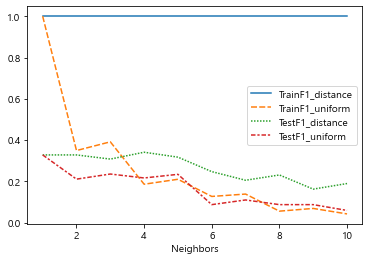

In [57]:
sns.lineplot(data = df_score_weights_pivot)

In [58]:
# uniform

In [64]:
# 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

train_score = []
test_score = []
train_f1, test_f1 = [], []

# 이웃 수
para_n_neighbors = [i for i in range(1, 11)] * 3

# 거리 계산 방법
para_metrics = ['minkowski'] * 10 + ['euclidean'] * 10 + ['manhattan'] * 10

for (v_n_neighbors, v_metrics) in zip (para_n_neighbors, para_metrics):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric = v_metrics, weights = 'uniform')
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))  
    
    train_pred = knn.predict(df_train_x)
    test_pred = knn.predict(df_test_x)
    train_f1.append(f1_score(df_train_y, train_pred))
    test_f1.append(f1_score(df_test_y, test_pred))

# 결과 저장
df_score_metrics = pd.DataFrame()
df_score_metrics['Neighbors'] = para_n_neighbors
df_score_metrics['Metrics'] = para_metrics
df_score_metrics['TrainScore'] = train_score
df_score_metrics['TestScore'] = test_score
df_score_metrics['TrainF1'] = train_f1
df_score_metrics['TestF1'] = test_f1

df_score_weights.round(3)

,Neighbors,Weights,TrainScore,TestScore,TrainF1,TestF1
0,1,uniform,1.000,0.891,1.000,0.328
1,2,uniform,0.927,0.920,0.349,0.211
2,3,uniform,0.925,0.913,0.391,0.235
3,4,uniform,0.915,0.923,0.186,0.216
4,5,uniform,0.915,0.921,0.210,0.234
5,6,uniform,0.913,0.916,0.127,0.087
6,7,uniform,0.913,0.913,0.138,0.110
7,8,uniform,0.909,0.916,0.055,0.087
8,9,uniform,0.909,0.916,0.068,0.087
9,10,uniform,0.909,0.915,0.042,0.059


<AxesSubplot:xlabel='Neighbors'>

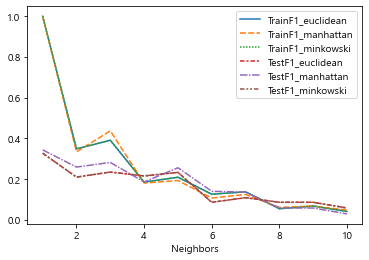

In [65]:
# plt 그리기 위해 데이터프레임의 형태를 변환

df_score_metrics_pivot = df_score_metrics.pivot(index = 'Neighbors', columns = 'Metrics', values = ['TrainF1', 'TestF1'])
level0 = df_score_metrics_pivot.columns.get_level_values(0) 
level1 = df_score_metrics_pivot.columns.get_level_values(1) 
df_score_metrics_pivot.columns = level0 + '_' + level1

sns.lineplot(data = df_score_metrics_pivot)

In [66]:
# 거리 계산 방법별 정확도의 차이가 없음

In [67]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors=4, weights='uniform', metric = 'euclidean')
knn_model.fit(df_train_x, df_train_y)

y_pred = knn_model.predict(df_test_x)

print('평가용 데이터의 정확도:{:.3f}'.format(f1_score(df_test_y, y_pred)))
print('혼동행렬\n', confusion_matrix(df_test_y, y_pred))
print(classification_report(df_test_y, y_pred))

평가용 데이터의 정확도:0.216
혼동행렬
 [[684   0]
 [ 58   8]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       684
           1       1.00      0.12      0.22        66

    accuracy                           0.92       750
   macro avg       0.96      0.56      0.59       750
weighted avg       0.93      0.92      0.89       750



# 표준화해보기

In [68]:
v_feature_name = df_train_x.columns
scalar = StandardScaler()
df_train_scaled_x = scalar.fit_transform(df_train_x)
df_test_scaled_x = scalar.transform(df_test_x)

In [70]:
df_train_scaled_x = pd.DataFrame(df_train_scaled_x, columns = v_feature_name)
df_test_scaled_x = pd.DataFrame(df_test_scaled_x, columns = v_feature_name)
df_train_scaled_x.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-0.842503,0.095933,0.089837,-1.236705,-0.272211,-0.340120,0.738012,-0.004791,1.708454,-1.739750,0.646656,-0.646656,-0.3758,2.203513,-0.824920,-0.574012,-0.130233,-0.193314
1,0.503899,0.442083,0.383761,-0.151444,-0.272211,-0.340120,-0.176614,-0.650392,0.871261,0.559778,0.646656,-0.646656,-0.3758,2.203513,-0.824920,-0.574012,-0.130233,-0.193314
2,-0.291702,0.135281,-0.259109,-0.151444,1.427971,2.106699,2.003515,0.013920,2.022401,0.388368,0.646656,-0.646656,-0.3758,-0.453821,-0.824920,1.742123,-0.130233,-0.193314
3,-0.947417,0.006812,-0.421775,1.612106,-0.272211,-0.340120,2.116538,-0.650392,2.650295,-0.704729,-1.546416,1.546416,-0.3758,-0.453821,1.212239,-0.574012,-0.130233,-0.193314
4,-0.265474,0.236048,-0.125396,0.001904,-0.272211,-0.340120,-0.054739,-0.004791,0.348016,1.027031,-1.546416,1.546416,-0.3758,2.203513,-0.824920,-0.574012,-0.130233,-0.193314


In [72]:
# 기본 옵션으로

knn_uncustomized_scaled = KNeighborsClassifier()
knn_uncustomized_scaled.fit(df_train_scaled_x, df_train_y)

pred_train_scaled = knn_uncustomized_scaled.predict(df_train_scaled_x)
pred_test_scaled = knn_uncustomized_scaled.predict(df_test_scaled_x)

print('학습용 데이터의 F1 score: {}'.format(f1_score(df_train_y, pred_train_scaled)))
print('평가용 데이터의 F1 score: {}'.format(f1_score(df_test_y, pred_test_scaled)))

print('학습용 데이터의 정확도: {}'.format(knn_uncustomized_scaled.score(df_train_scaled_x, df_train_y)))
print('평가용 데이터의 정확도: {}'.format(knn_uncustomized_scaled.score(df_test_scaled_x, df_test_y)))

학습용 데이터의 F1 score: 0.5040214477211796
평가용 데이터의 F1 score: 0.3291139240506329
학습용 데이터의 정확도: 0.938292194796531
평가용 데이터의 정확도: 0.9293333333333333


- K수 증가에 따른 정확도

In [74]:
train_score_scaled = []
test_score_scaled = []
train_f1_scaled, test_f1_scaled = [], []

para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_scaled_x, df_train_y)
    train_score_scaled.append(knn.score(df_train_scaled_x, df_train_y))
    test_score_scaled.append(knn.score(df_test_scaled_x, df_test_y))  
    
    train_pred_scaled = knn.predict(df_train_scaled_x)
    test_pred_scaled = knn.predict(df_test_scaled_x)
    train_f1_scaled.append(f1_score(df_train_y, train_pred_scaled))
    test_f1_scaled.append(f1_score(df_test_y, test_pred_scaled))

# 결과 저장
df_score_neighbors_scaled = pd.DataFrame()
df_score_neighbors_scaled['n_neighbors'] = para_n_neighbors
df_score_neighbors_scaled['TrainScore'] = train_score_scaled
df_score_neighbors_scaled['TestScore'] = test_score_scaled
df_score_neighbors_scaled['TrainF1'] = train_f1_scaled
df_score_neighbors_scaled['TestF1'] = test_f1_scaled

df_score_neighbors_scaled.round(3)

,n_neighbors,TrainScore,TestScore,TrainF1,TestF1
0,1,1.000,0.955,1.000,0.653
1,2,0.955,0.933,0.684,0.390
2,3,0.961,0.937,0.735,0.447
3,4,0.936,0.929,0.480,0.329
4,5,0.938,0.929,0.504,0.329
5,6,0.927,0.923,0.349,0.216
6,7,0.928,0.923,0.373,0.216
7,8,0.920,0.919,0.245,0.141
8,9,0.923,0.919,0.299,0.141
9,10,0.917,0.919,0.194,0.141


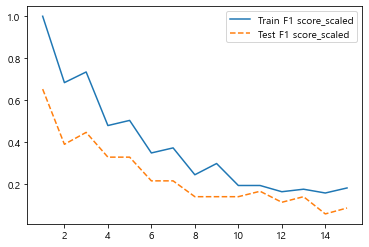

In [75]:
plt.plot(para_n_neighbors, train_f1_scaled, linestyle = '-', label = 'Train F1 score_scaled')
plt.plot(para_n_neighbors, test_f1_scaled, linestyle = '--', label = 'Test F1 score_scaled')
plt.legend()

In [50]:
# k = 5

In [77]:
# 가중치별 이웃 수 증가에 따른 정확도 변화

train_score_scaled = []
test_score_scaled = []
train_f1_scaled, test_f1_scaled = [], []
# 이웃 수
para_n_neighbors = [i for i in range(1, 11)] * 2
# 가중치 종류
para_weights = (['uniform']) * 10 + (['distance'] * 10) 

for (v_n_neighbors, v_weights) in zip (para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(df_train_scaled_x, df_train_y)
    train_score_scaled.append(knn.score(df_train_scaled_x, df_train_y))
    test_score_scaled.append(knn.score(df_test_scaled_x, df_test_y))  
    
    train_pred_scaled = knn.predict(df_train_scaled_x)
    test_pred_scaled = knn.predict(df_test_scaled_x)
    train_f1_scaled.append(f1_score(df_train_y, train_pred_scaled))
    test_f1_scaled.append(f1_score(df_test_y, test_pred_scaled))

# 결과 저장
df_score_weights_scaled = pd.DataFrame()
df_score_weights_scaled['Neighbors'] = para_n_neighbors
df_score_weights_scaled['Weights'] = para_weights
df_score_weights_scaled['TrainScore'] = train_score_scaled
df_score_weights_scaled['TestScore'] = test_score_scaled
df_score_weights_scaled['TrainF1'] = train_f1_scaled
df_score_weights_scaled['TestF1'] = test_f1_scaled

df_score_weights_scaled.round(3)

,Neighbors,Weights,TrainScore,TestScore,TrainF1,TestF1
0,1,uniform,1.000,0.955,1.000,0.653
1,2,uniform,0.955,0.933,0.684,0.390
2,3,uniform,0.961,0.937,0.735,0.447
3,4,uniform,0.936,0.929,0.480,0.329
4,5,uniform,0.938,0.929,0.504,0.329
5,6,uniform,0.927,0.923,0.349,0.216
6,7,uniform,0.928,0.923,0.373,0.216
7,8,uniform,0.920,0.919,0.245,0.141
8,9,uniform,0.923,0.919,0.299,0.141
9,10,uniform,0.917,0.919,0.194,0.141


In [78]:
# plt 그리기 위해 데이터프레임의 형태를 변환

df_score_weights_scaled_pivot = df_score_weights_scaled.pivot(index = 'Neighbors', columns = 'Weights', values = ['TrainF1', 'TestF1'])
df_score_weights_scaled_pivot

TrainF1              TestF1          
Weights   distance   uniform  distance   uniform
Neighbors                                       
1              1.0  1.000000  0.653061  0.653061
2              1.0  0.683962  0.653061  0.390244
3              1.0  0.734694  0.595745  0.447059
4              1.0  0.479564  0.580645  0.329114
5              1.0  0.504021  0.516854  0.329114
6              1.0  0.349112  0.500000  0.216216
7              1.0  0.373178  0.447059  0.216216
8              1.0  0.245283  0.428571  0.140845
9              1.0  0.298780  0.370370  0.140845
10             1.0  0.194175  0.370370  0.140845

In [79]:
level0 = df_score_weights_scaled_pivot.columns.get_level_values(0) # Index(['TrainF1', 'TrainF1', 'TestF1', 'TestF1'], dtype='object')
level1 = df_score_weights_scaled_pivot.columns.get_level_values(1) # Index(['distance', 'uniform', 'distance', 'uniform'], dtype='object', name='Weights')
df_score_weights_scaled_pivot.columns = level0 + '_' + level1
df_score_weights_scaled_pivot

,TrainF1_distance,TrainF1_uniform,TestF1_distance,TestF1_uniform
Neighbors,,,,
1,1.0,1.000000,0.653061,0.653061
2,1.0,0.683962,0.653061,0.390244
3,1.0,0.734694,0.595745,0.447059
4,1.0,0.479564,0.580645,0.329114
5,1.0,0.504021,0.516854,0.329114
6,1.0,0.349112,0.500000,0.216216
7,1.0,0.373178,0.447059,0.216216
8,1.0,0.245283,0.428571,0.140845
9,1.0,0.298780,0.370370,0.140845


<AxesSubplot:xlabel='Neighbors'>

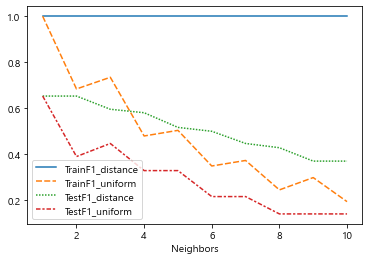

In [80]:
sns.lineplot(data = df_score_weights_scaled_pivot)

In [58]:
# uniform

In [81]:
# 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

train_score_scaled = []
test_score_scaled = []
train_f1_scaled, test_f1_scaled = [], []

# 이웃 수
para_n_neighbors = [i for i in range(1, 11)] * 3

# 거리 계산 방법
para_metrics = ['minkowski'] * 10 + ['euclidean'] * 10 + ['manhattan'] * 10

for (v_n_neighbors, v_metrics) in zip (para_n_neighbors, para_metrics):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric = v_metrics, weights = 'uniform')
    knn.fit(df_train_scaled_x, df_train_y)
    train_score_scaled.append(knn.score(df_train_scaled_x, df_train_y))
    test_score_scaled.append(knn.score(df_test_scaled_x, df_test_y))  
    
    train_pred_scaled = knn.predict(df_train_scaled_x)
    test_pred_scaled = knn.predict(df_test_scaled_x)
    train_f1_scaled.append(f1_score(df_train_y, train_pred_scaled))
    test_f1_scaled.append(f1_score(df_test_y, test_pred_scaled))

# 결과 저장
df_score_metrics_scaled = pd.DataFrame()
df_score_metrics_scaled['Neighbors'] = para_n_neighbors
df_score_metrics_scaled['Metrics'] = para_metrics
df_score_metrics_scaled['TrainScore'] = train_score_scaled
df_score_metrics_scaled['TestScore'] = test_score_scaled
df_score_metrics_scaled['TrainF1'] = train_f1_scaled
df_score_metrics_scaled['TestF1'] = test_f1_scaled

df_score_metrics_scaled.round(3)

,Neighbors,Metrics,TrainScore,TestScore,TrainF1,TestF1
0,1,minkowski,1.000,0.955,1.000,0.653
1,2,minkowski,0.955,0.933,0.684,0.390
2,3,minkowski,0.961,0.937,0.735,0.447
3,4,minkowski,0.936,0.929,0.480,0.329
4,5,minkowski,0.938,0.929,0.504,0.329
5,6,minkowski,0.927,0.923,0.349,0.216
6,7,minkowski,0.928,0.923,0.373,0.216
7,8,minkowski,0.920,0.919,0.245,0.141
8,9,minkowski,0.923,0.919,0.299,0.141
9,10,minkowski,0.917,0.919,0.194,0.141


<AxesSubplot:xlabel='Neighbors'>

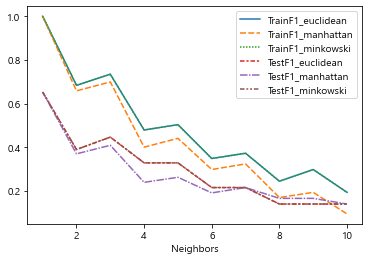

In [83]:
# plt 그리기 위해 데이터프레임의 형태를 변환

df_score_metrics_scaled_pivot = df_score_metrics_scaled.pivot(index = 'Neighbors', columns = 'Metrics', values = ['TrainF1', 'TestF1'])
level0 = df_score_metrics_scaled_pivot.columns.get_level_values(0) 
level1 = df_score_metrics_scaled_pivot.columns.get_level_values(1) 
df_score_metrics_scaled_pivot.columns = level0 + '_' + level1

sns.lineplot(data = df_score_metrics_scaled_pivot)

In [66]:
# 거리 계산 방법별 정확도의 차이가 없음

In [94]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric = 'euclidean')
knn_model.fit(df_train_scaled_x, df_train_y)

y_pred_scaled = knn_model.predict(df_test_scaled_x)

print('평가용 데이터의 정확도:{:.3f}'.format(f1_score(df_test_y, y_pred_scaled)))
print('혼동행렬\n', confusion_matrix(df_test_y, y_pred_scaled))
print(classification_report(df_test_y, y_pred_scaled))

평가용 데이터의 정확도:0.447
혼동행렬
 [[684   0]
 [ 47  19]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       684
           1       1.00      0.29      0.45        66

    accuracy                           0.94       750
   macro avg       0.97      0.64      0.71       750
weighted avg       0.94      0.94      0.92       750



In [95]:
df_f1 = [f1_score(df_test_y, y_pred), f1_score(df_test_y, y_pred_scaled)]
lists = ['Default', 'Scaled']



<BarContainer object of 2 artists>

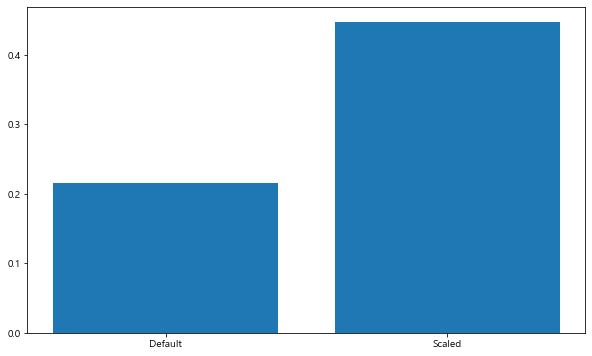

In [98]:
plt.figure(figsize = (10, 6))
plt.bar(lists, df_f1)

# 실습